Datos originales:
         Date    Adj Close        Close         High          Low  \
0  2012-01-03  8732.391602  8732.400391  8743.299805  8597.099609   
1  2012-01-04  8581.791016  8581.799805  8701.299805  8526.799805   
2  2012-01-05  8329.590820  8329.599609  8598.700195  8301.200195   
3  2012-01-06  8289.090820  8289.099609  8445.900391  8233.799805   
4  2012-01-09  8278.891602  8278.900391  8404.400391  8250.099609   

          Open     Volume  Daily Range  Price Change  Log Volume  
0  8739.200195  186689000   146.200195     -6.799805   19.044955  
1  8683.400391  243803000   174.500000   -101.600586   19.311871  
2  8598.700195  192704000   297.500000   -269.100586   19.076666  
3  8369.700195  153765000   212.100586    -80.600586   18.850936  
4  8314.500000  173948000   154.300781    -35.599609   18.974267  


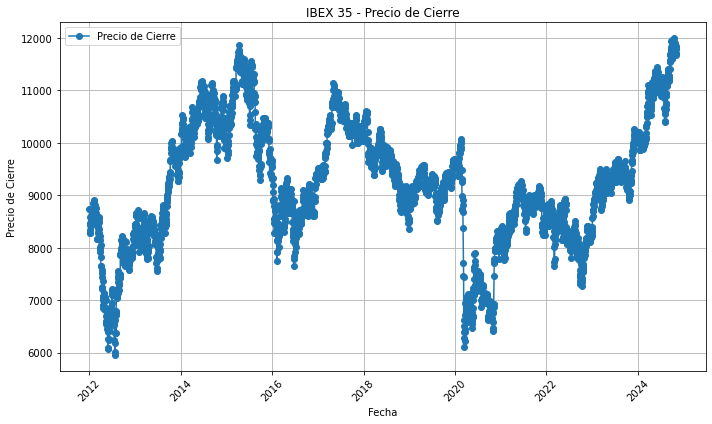

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
file_path = "../data/ibex_data_clean.csv"  # Ajusta la ruta si es necesario
df = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame
print("Datos originales:")
print(df.head())

# Convertir la columna 'Date' a tipo datetime y establecerla como índice
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')  # Asegúrate de que el formato coincida
df.set_index('Date', inplace=True)

# Filtrar todas las filas donde 'Close' no sea nulo o NaN
df_filtered = df.dropna(subset=['Close'])

# Graficar la columna 'Close'
plt.figure(figsize=(10, 6))
plt.plot(df_filtered.index, df_filtered['Close'], marker='o', linestyle='-', label='Precio de Cierre')
plt.title('IBEX 35 - Precio de Cierre')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.xticks(rotation=45)  # Rotea las etiquetas del eje x para mayor claridad
plt.grid(True)
plt.legend()  # Muestra la leyenda
plt.tight_layout()  # Ajusta el diseño
plt.show()

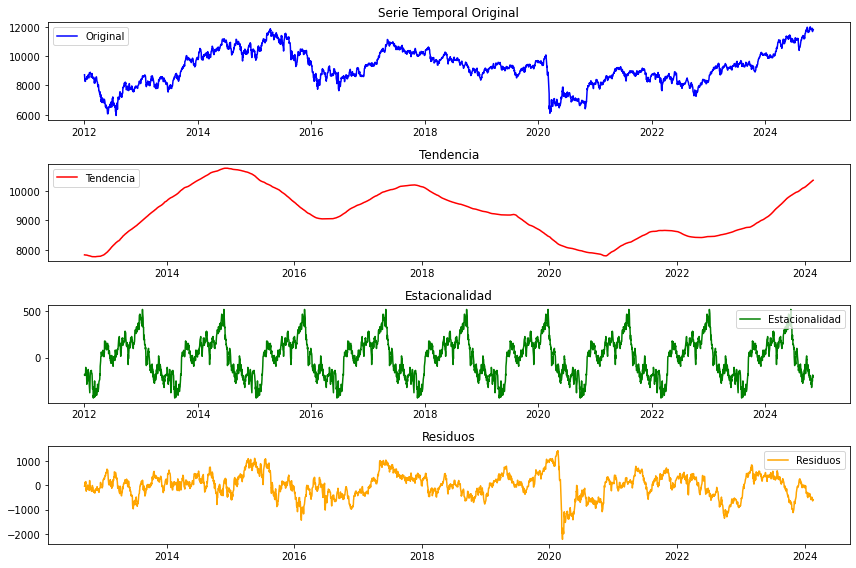

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomposición de la serie temporal
decomposition = seasonal_decompose(df_filtered['Close'], model='additive', period= 365)

# Obtención de las componentes
trend = decomposition.trend
seasonal = decomposition.seasonal
residuals = decomposition.resid

# Graficar las componentes
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df['Close'], label='Original', color='blue')
plt.legend()
plt.title('Serie Temporal Original')

plt.subplot(412)
plt.plot(trend, label='Tendencia', color='red')
plt.legend()
plt.title('Tendencia')

plt.subplot(413)
plt.plot(seasonal, label='Estacionalidad', color='green')
plt.legend()
plt.title('Estacionalidad')

plt.subplot(414)
plt.plot(residuals, label='Residuos', color='orange')
plt.legend()
plt.title('Residuos')

plt.tight_layout()
plt.show()

In [19]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba (80% entrenamiento, 20% prueba)
train_size = int(len(df_filtered) * 0.8)
train, test = df_filtered.iloc[:train_size], df_filtered.iloc[train_size:]

# Ajustar el modelo SARIMA automáticamente



In [20]:
import pandas as pd
from pmdarima import auto_arima

# Establecer la frecuencia de los datos (por ejemplo, 'D' para diario, 'M' para mensual, 'Y' para anual)
frequency = 'D'  # Por ejemplo, si los datos son mensuales

# Definir el número de períodos en una temporada (ajustar según sea necesario)
seasonal_periods = 365  # Por ejemplo, si los datos son mensuales y tienen estacionalidad anual

# Supongamos que df contiene múltiples columnas y deseamos modelar solo una de ellas
serie_temporal = df['Close']  # Reemplaza 'nombre_de_la_columna' con el nombre de la columna que deseas modelar

# Definir el rango de hiperparámetros
start_p = 3
d = None
start_q = 0
start_P = 0
D = None
start_Q = 1
max_p = 3
max_d = 2  # Ahora establecemos max_d como un entero positivo
max_q = 3
max_P = 0
max_D = 1  # Ya que se trata de una estacionalidad diferenciada (en la mayoría de los casos, D=1)
max_Q = 1

# Utilizar auto_arima para buscar automáticamente los mejores hiperparámetros minimizando el MAE
model = auto_arima(serie_temporal, seasonal=True, m=seasonal_periods, start_p=start_p, d=d, start_q=start_q,
                   start_P=start_P, D=D, start_Q=start_Q, max_p=max_p, max_d=max_d, max_q=max_q, max_P=max_P,
                   max_D=max_D, max_Q=max_Q, stepwise=True, suppress_warnings=True, trace=True,
                   scoring='mae')

# Imprimir los mejores hiperparámetros encontrados por auto_arima
print("Mejores hiperparámetros SARIMA:", model.get_params())


Performing stepwise search to minimize aic


MemoryError: Unable to allocate 3.30 GiB for an array with shape (367, 367, 3284) and data type float64

Métricas del Modelo SARIMA: (10034941494.227476, 75123.12862816443, 100174.55512368136, -0.07953107025073702)


c:\Users\jvelareb\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


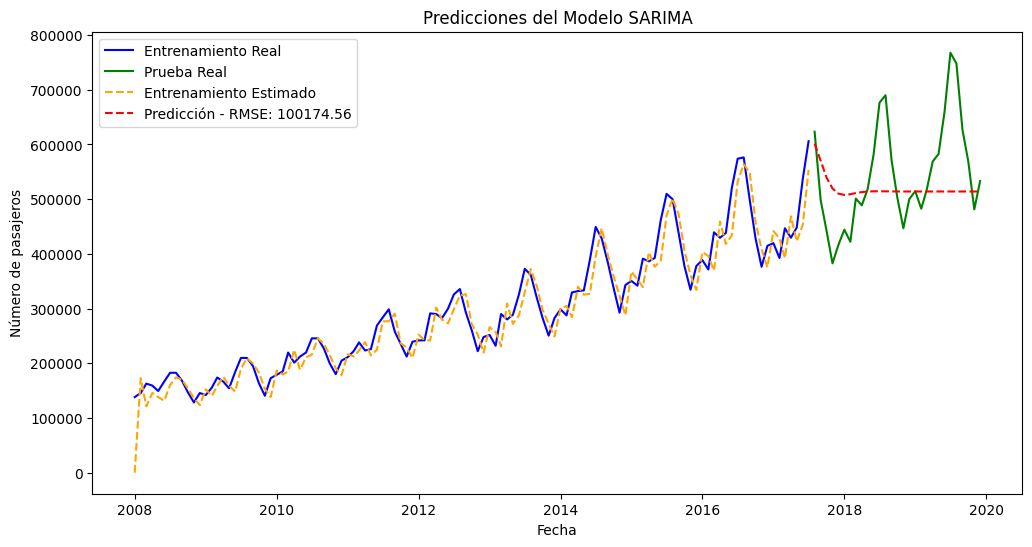

SARIMA - AIC: 2686.044853128649 BIC: 2696.9896469222267


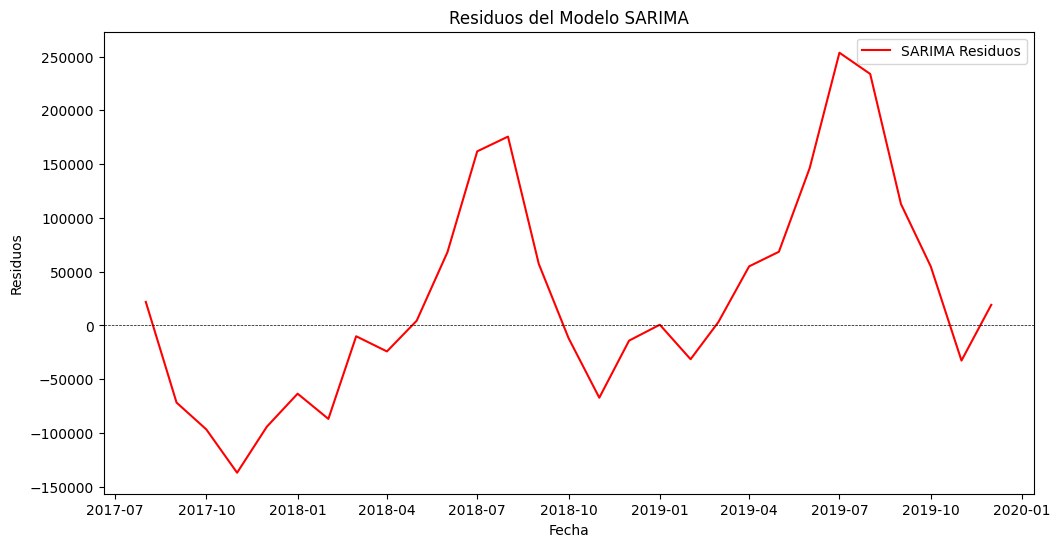

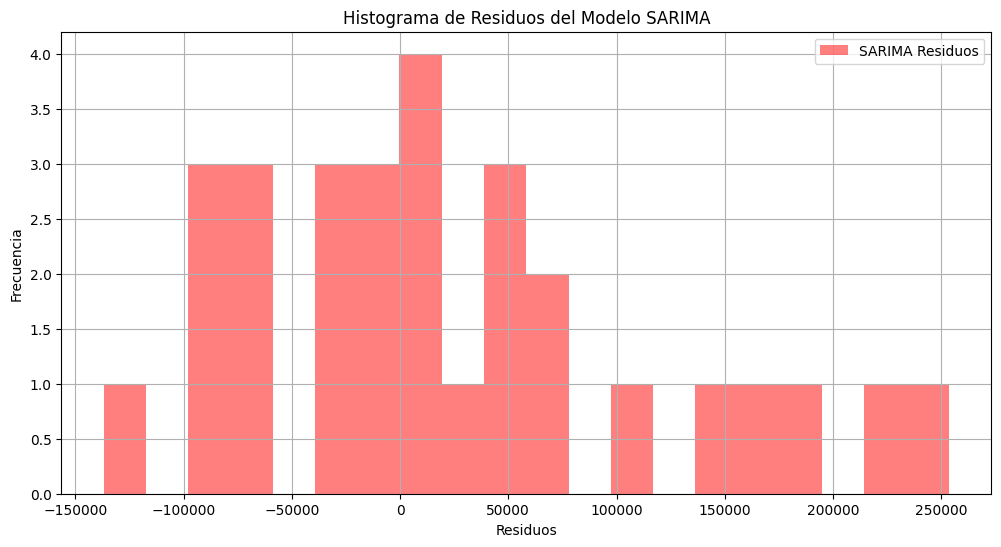

                Fecha  SARIMA Residuos
Fecha                                 
2017-08-01 2017-08-01     21890.738029
2017-09-01 2017-09-01    -71772.468883
2017-10-01 2017-10-01    -96721.390988
2017-11-01 2017-11-01   -136988.113126
2017-12-01 2017-12-01    -94159.966075
2018-01-01 2018-01-01    -63496.027060
2018-02-01 2018-02-01    -86925.434341
2018-03-01 2018-03-01    -10083.824763
2018-04-01 2018-04-01    -24190.969098
2018-05-01 2018-05-01      4388.273547
2018-06-01 2018-06-01     68142.909318
2018-07-01 2018-07-01    161887.818540
2018-08-01 2018-08-01    175577.461706
2018-09-01 2018-09-01     57248.965941
2018-10-01 2018-10-01    -11757.361006
2018-11-01 2018-11-01    -67236.693364
2018-12-01 2018-12-01    -14158.772423
2019-01-01 2019-01-01       646.669764
2019-02-01 2019-02-01    -31446.025726
2019-03-01 2019-03-01      3097.865893
2019-04-01 2019-04-01     54920.693277
2019-05-01 2019-05-01     68492.362839
2019-06-01 2019-06-01    146233.887991
2019-07-01 2019-07-01    

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Ajustar el modelo SARIMA
sarima_model2 = SARIMAX(train['Close'], order=(2, 1, 1), seasonal_order=(0, 0, 0, 0))
sarima_fit2 = sarima_model2.fit()

# Predecir tanto en el conjunto de entrenamiento como de test para comparar el pasado real y estimado
train_predictions = sarima_fit2.predict(start=0, end=len(train) - 1, typ='levels')
sarima_predictions2 = sarima_fit2.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Calcular métricas de validación
def calcular_metricas(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, rmse, r2

# Calculamos las métricas para el conjunto de prueba
sarima_metrics2 = calcular_metricas(test['Close'], sarima_predictions2)

# Imprimir las métricas
print("Métricas del Modelo SARIMA:", sarima_metrics2)

# Graficar los resultados: pasado real, pasado estimado y predicciones
plt.figure(figsize=(12, 6))

# Graficar la serie real del conjunto de entrenamiento y de prueba
plt.plot(train.index, train['Close'], label='Entrenamiento Real', color='blue')
plt.plot(test.index, test['Close'], label='Prueba Real', color='green')

# Graficar las predicciones del entrenamiento y prueba
plt.plot(train.index, train_predictions, label='Entrenamiento Estimado', linestyle='--', color='orange')
plt.plot(test.index, sarima_predictions2, label=f'Predicción - RMSE: {sarima_metrics2[2]:.2f}', linestyle='--', color='red')

# Configuración del gráfico
plt.xlabel('Fecha')
plt.ylabel('Cierre')
plt.title('Predicciones del Modelo SARIMA')
plt.legend()
plt.show()

# Imprimir el AIC y BIC del modelo
print("SARIMA - AIC:", sarima_fit2.aic, "BIC:", sarima_fit2.bic)

# Obtener los residuos del modelo
sarima_residuals2 = test['Close'] - sarima_predictions2

# Graficar los residuos
plt.figure(figsize=(12, 6))
plt.plot(test.index, sarima_residuals2, label='SARIMA Residuos', color='red')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel('Fecha')
plt.ylabel('Residuos')
plt.title('Residuos del Modelo SARIMA')
plt.legend()
plt.show()

# Graficar histograma de los residuos
plt.figure(figsize=(12, 6))
plt.hist(sarima_residuals2, bins=20, color='red', alpha=0.5, label='SARIMA Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos del Modelo SARIMA')
plt.legend()
plt.grid(True)
plt.show()

# Crear un DataFrame para los residuos
residuals_df = pd.DataFrame({
    'Fecha': test.index,
    'SARIMA Residuos': sarima_residuals2
})

# Mostrar la tabla de resultados de residuos
print(residuals_df)

# Calcular y mostrar el coeficiente R²
r2_train = r2_score(train['Close'], train_predictions)
print(f'Coeficiente de determinación R² en entrenamiento: {r2_train:.2f}')
print(f'Coeficiente de determinación R² en prueba: {sarima_metrics2[3]:.2f}')

c:\Users\jvelareb\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\jvelareb\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\jvelareb\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


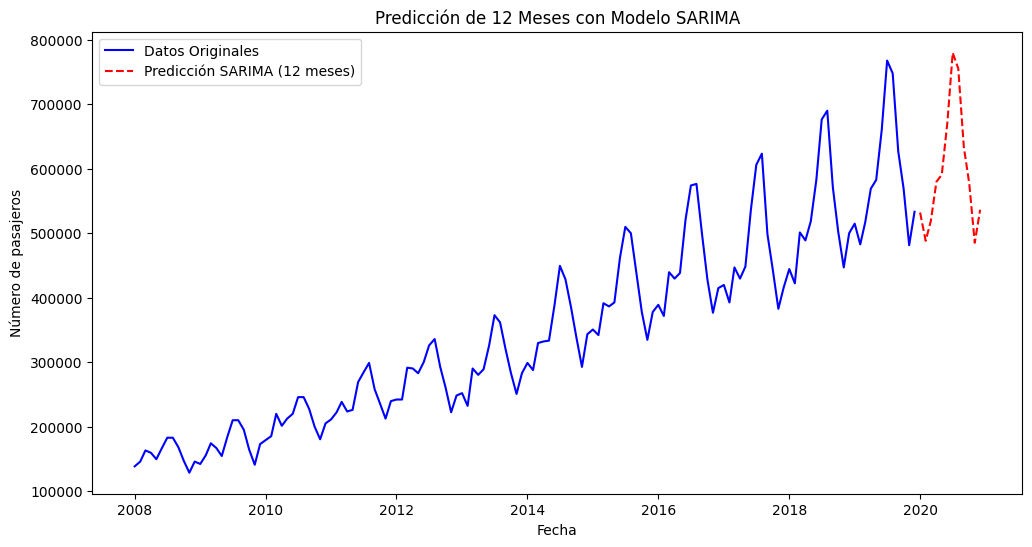

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SARIMAX
import numpy as np

# Ajustar el modelo SARIMA a todos los datos
sarima_model = SARIMAX(df['Close'], order=(0, 0, 3), seasonal_order=(0, 1, 1, 30)) # Capturamos la estacionalidad mensual en una serie diaria
sarima_fit = sarima_model.fit()

# Realizar la predicción de los próximos 180 días (aproximadamente 6 meses)
start_date = df.index[-1] + pd.DateOffset(days=1)  # Iniciar predicción al día siguiente
end_date = start_date + pd.DateOffset(days=179)  # 180 días después para cubrir 6 meses

# Hacer la predicción con SARIMA
sarima_predictions_180days = sarima_fit.predict(start=start_date, end=end_date, typ='levels')

# Graficar las predicciones de los próximos 6 meses
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Datos Originales', color='blue')
plt.plot(sarima_predictions_180days.index, sarima_predictions_180days, label='Predicción SARIMA (6 meses)', color='red', linestyle='--')
plt.xlabel('Fecha')
plt.ylabel('Cierre')
plt.title('Predicción de 6 Meses con Modelo SARIMA')
plt.legend()
plt.show()

C:\Users\jvela\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\jvela\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


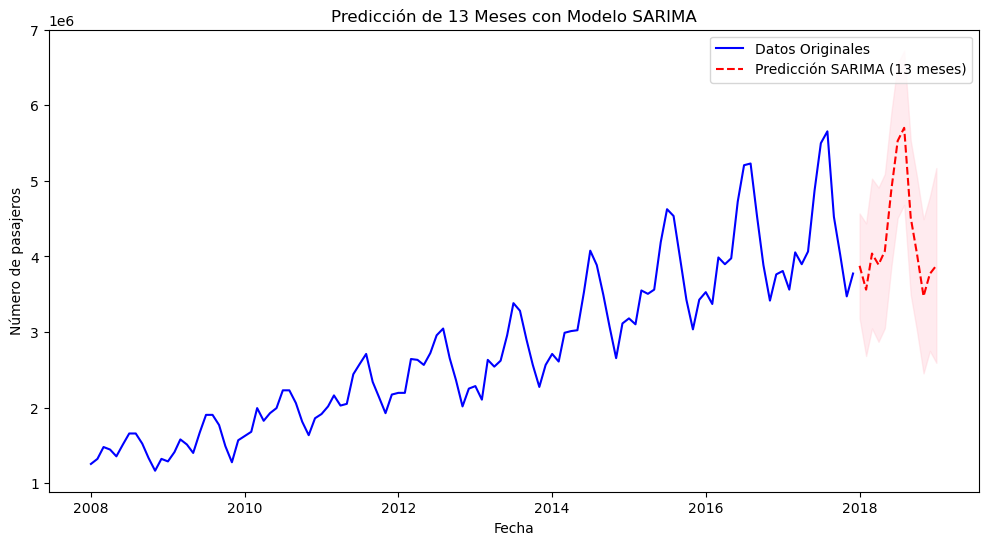

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SARIMAX

# Ajustar el modelo SARIMA a todos los datos
sarima_model = SARIMAX(df['Close'], order=(0, 0, 3), seasonal_order=(0, 1, 1, 30))
sarima_fit = sarima_model.fit()

# Obtener predicciones y sus intervalos de confianza para los próximos 6 meses
forecast = sarima_fit.get_forecast(steps=210)  # Predicción de 6 meses + 1 (7 meses en total)
forecast_values = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Graficar las predicciones de los próximos 6 meses con intervalo de confianza
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Datos Originales', color='blue')
plt.plot(forecast_values.index, forecast_values, label='Predicción SARIMA (7 meses)', color='red', linestyle='--')
plt.fill_between(forecast_values.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Fecha')
plt.ylabel('Número de pasajeros')
plt.title('Predicción de 7 Meses con Modelo SARIMA')
plt.legend()
plt.show()

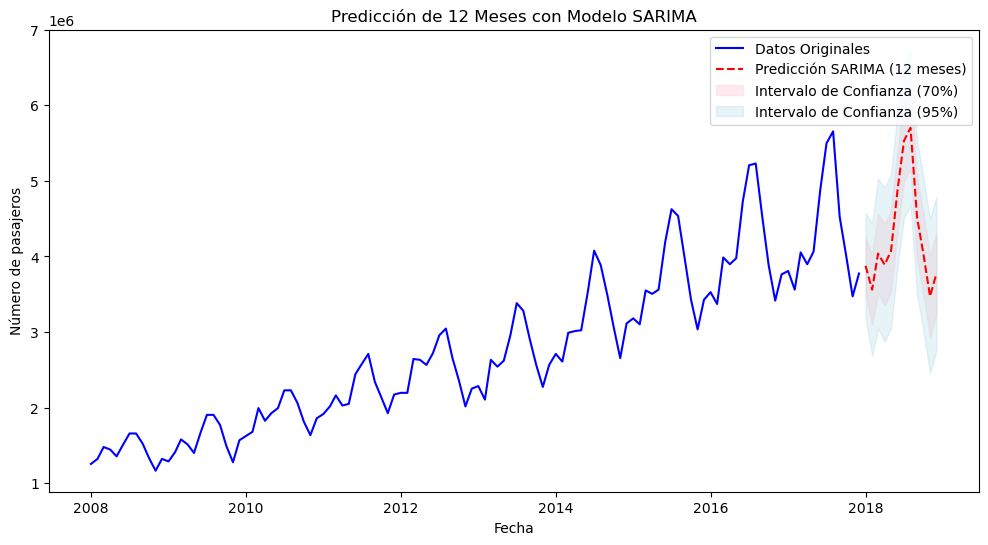

In [ ]:
# Obtener los intervalos de confianza del 70% y 95%
confidence_intervals_70 = sarima_fit.get_forecast(steps=12).conf_int(alpha=0.3)
confidence_intervals_95 = sarima_fit.get_forecast(steps=12).conf_int(alpha=0.05)

# Graficar las predicciones de los próximos 12 meses con intervalo de confianza
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Datos Originales', color='blue')
plt.plot(sarima_predictions_180days.index, sarima_predictions_180days, label='Predicción SARIMA (6 meses)', color='red', linestyle='--')
plt.fill_between(sarima_predictions_180days.index, confidence_intervals_70.iloc[:, 0], confidence_intervals_70.iloc[:, 1], color='pink', alpha=0.3, label='Intervalo de Confianza (70%)')
plt.fill_between(sarima_predictions_180days.index, confidence_intervals_95.iloc[:, 0], confidence_intervals_95.iloc[:, 1], color='lightblue', alpha=0.3, label='Intervalo de Confianza (95%)')
plt.xlabel('Fecha')
plt.ylabel('Número de pasajeros')
plt.title('Predicción de 6 Meses con Modelo SARIMA')
plt.legend()
plt.show()


c:\Users\jvelareb\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


Métricas del Modelo SARIMA: (10034941494.227476, 75123.12862816443, 100174.55512368136, -0.07953107025073702)


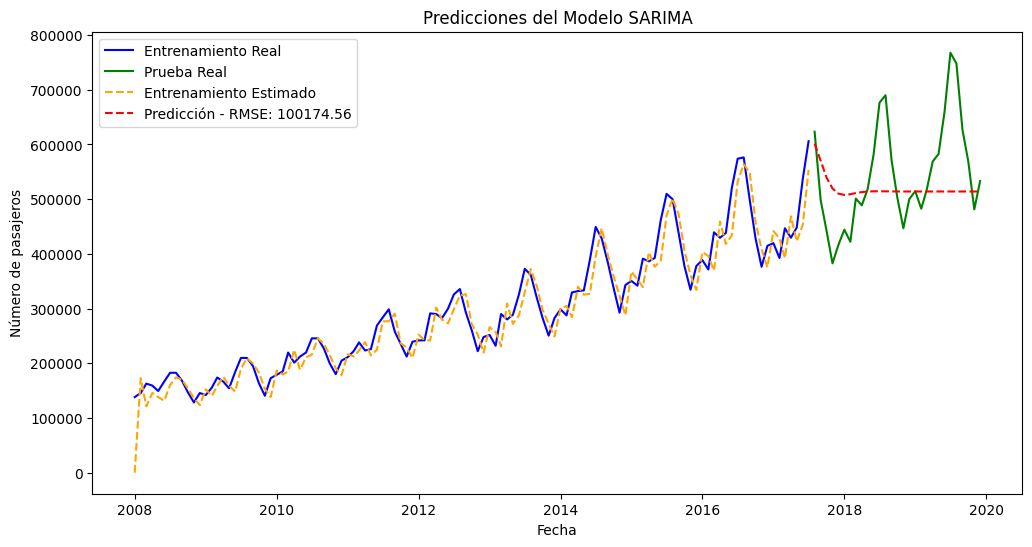

SARIMA - AIC: 2686.044853128649 BIC: 2696.9896469222267


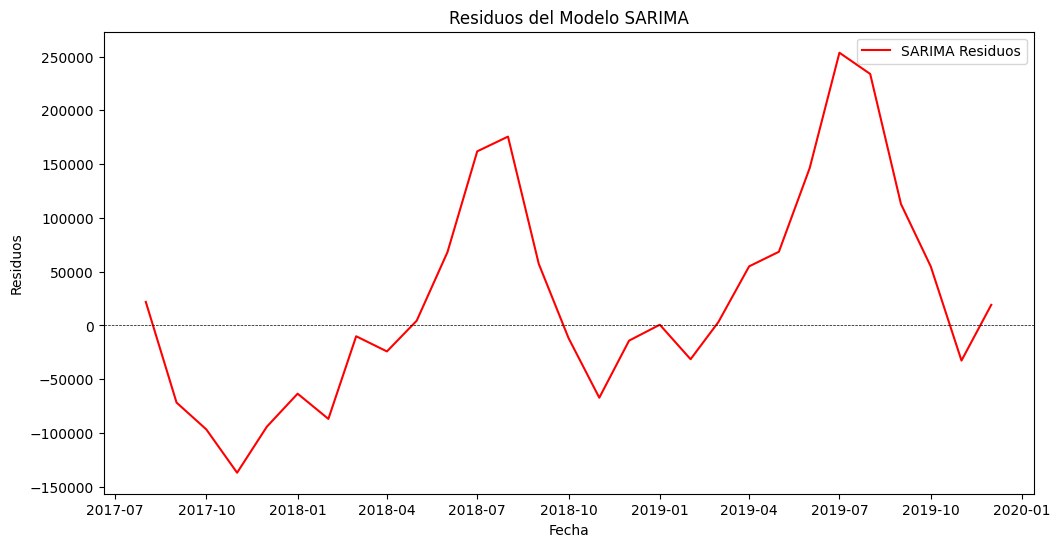

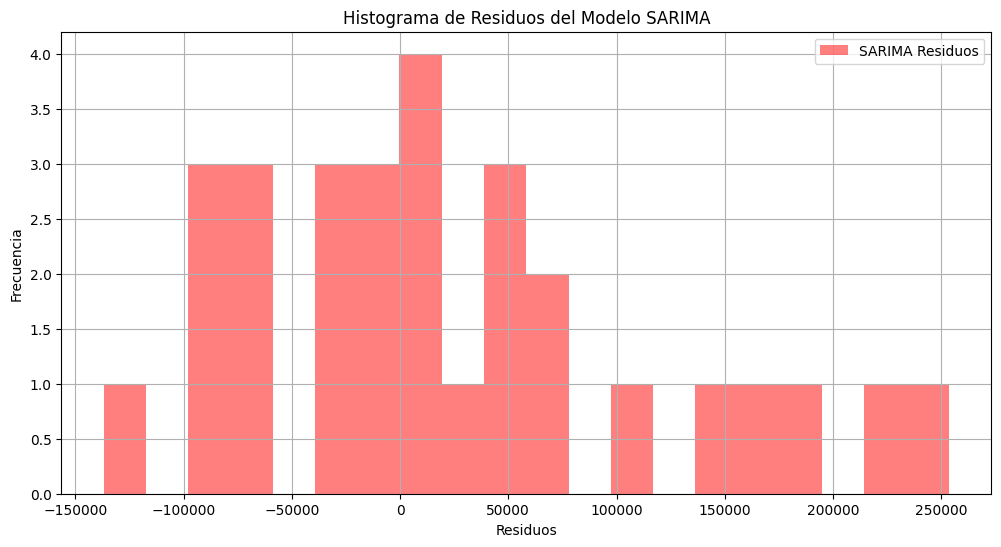

                Fecha  SARIMA Residuos
Fecha                                 
2017-08-01 2017-08-01     21890.738029
2017-09-01 2017-09-01    -71772.468883
2017-10-01 2017-10-01    -96721.390988
2017-11-01 2017-11-01   -136988.113126
2017-12-01 2017-12-01    -94159.966075
2018-01-01 2018-01-01    -63496.027060
2018-02-01 2018-02-01    -86925.434341
2018-03-01 2018-03-01    -10083.824763
2018-04-01 2018-04-01    -24190.969098
2018-05-01 2018-05-01      4388.273547
2018-06-01 2018-06-01     68142.909318
2018-07-01 2018-07-01    161887.818540
2018-08-01 2018-08-01    175577.461706
2018-09-01 2018-09-01     57248.965941
2018-10-01 2018-10-01    -11757.361006
2018-11-01 2018-11-01    -67236.693364
2018-12-01 2018-12-01    -14158.772423
2019-01-01 2019-01-01       646.669764
2019-02-01 2019-02-01    -31446.025726
2019-03-01 2019-03-01      3097.865893
2019-04-01 2019-04-01     54920.693277
2019-05-01 2019-05-01     68492.362839
2019-06-01 2019-06-01    146233.887991
2019-07-01 2019-07-01    

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Ajustar el modelo SARIMA
sarima_model2 = SARIMAX(train['Close'], order=(2, 1, 1), seasonal_order=(0, 0, 0, 0))
sarima_fit2 = sarima_model2.fit()

# Predecir tanto en el conjunto de entrenamiento como de test para comparar el pasado real y estimado
train_predictions = sarima_fit2.predict(start=0, end=len(train) - 1, typ='levels')
sarima_predictions2 = sarima_fit2.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# Calcular métricas de validación
def calcular_metricas(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, rmse, r2

# Calculamos las métricas para el conjunto de prueba
sarima_metrics2 = calcular_metricas(test['Close'], sarima_predictions2)

# Imprimir las métricas
print("Métricas del Modelo SARIMA:", sarima_metrics2)

# Graficar los resultados: pasado real, pasado estimado y predicciones
plt.figure(figsize=(12, 6))

# Graficar la serie real del conjunto de entrenamiento y de prueba
plt.plot(train.index, train['Close'], label='Entrenamiento Real', color='blue')
plt.plot(test.index, test['Close'], label='Prueba Real', color='green')

# Graficar las predicciones del entrenamiento y prueba
plt.plot(train.index, train_predictions, label='Entrenamiento Estimado', linestyle='--', color='orange')
plt.plot(test.index, sarima_predictions2, label=f'Predicción - RMSE: {sarima_metrics2[2]:.2f}', linestyle='--', color='red')

# Configuración del gráfico
plt.xlabel('Fecha')
plt.ylabel('Cierre')
plt.title('Predicciones del Modelo SARIMA')
plt.legend()
plt.show()

# Imprimir el AIC y BIC del modelo
print("SARIMA - AIC:", sarima_fit2.aic, "BIC:", sarima_fit2.bic)

# Obtener los residuos del modelo
sarima_residuals2 = test['Close'] - sarima_predictions2

# Graficar los residuos
plt.figure(figsize=(12, 6))
plt.plot(test.index, sarima_residuals2, label='SARIMA Residuos', color='red')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel('Fecha')
plt.ylabel('Residuos')
plt.title('Residuos del Modelo SARIMA')
plt.legend()
plt.show()

# Graficar histograma de los residuos
plt.figure(figsize=(12, 6))
plt.hist(sarima_residuals2, bins=20, color='red', alpha=0.5, label='SARIMA Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos del Modelo SARIMA')
plt.legend()
plt.grid(True)
plt.show()

# Crear un DataFrame para los residuos
residuals_df = pd.DataFrame({
    'Fecha': test.index,
    'SARIMA Residuos': sarima_residuals2
})

# Mostrar la tabla de resultados de residuos
print(residuals_df)

# Calcular y mostrar el coeficiente R²
r2_train = r2_score(train['Close'], train_predictions)
print(f'Coeficiente de determinación R² en entrenamiento: {r2_train:.2f}')
print(f'Coeficiente de determinación R² en prueba: {sarima_metrics2[3]:.2f}')
